In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_files
from pyvi import ViTokenizer
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
%matplotlib inline

sees = 42

In [2]:
data_train = load_files(container_path = "data/news_1135/", encoding = "utf-8")

print(data_train.filenames)
print()
print("Tong so file: {}" .format( len(data_train.filenames)))
print("Danh sách 10 nhãn và id tương ứng: ", [(idx, name) for idx, name in enumerate(data_train.target_names)])

['data/news_1135/Tin kh†c\\0218e1df21ce358b9c6485176a48f1fcaeedef67.txt'
 'data/news_1135/Khoa học - Công nghệ\\bf9889f5f2ffd6c92fa877d35ef0ef5f34f0666d.txt'
 'data/news_1135/Tin kh†c\\d74aab054ffe9f8661df13bc52b438b48a63fe48.txt'
 ...
 'data/news_1135/Thời sự\\a06c1ec4c146d3b4eb5070a1967e10e5e21bdc5b.txt'
 'data/news_1135/Sức khỏe\\4187c4a1d528fd9ea4630d2709229df0b0d09c3d.txt'
 'data/news_1135/Thể thao\\7adaf0c561796f2411340150f18417543ad4403c.txt']

Tong so file: 1135
Danh sách 10 nhãn và id tương ứng:  [(0, 'Giải trí'), (1, 'Khoa học - Công nghệ'), (2, 'Kinh tế'), (3, 'Pháp luật'), (4, 'Sức khỏe'), (5, 'Thể thao'), (6, 'Thời sự'), (7, 'Tin kh†c'), (8, 'Độc giả'), (9, 'Đời sống - Xã hội')]


In [3]:
with open("data/vietnamese-stopwords.txt", encoding = 'utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip().replace(" ", "_") for x in stopwords]

print("Danh sách 10 từ dừng đầu tiên (từ không mang ý nghĩa phân loại): ", stopwords[:10])

Danh sách 10 từ dừng đầu tiên (từ không mang ý nghĩa phân loại):  ['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy']


In [4]:
module_count_vector = CountVectorizer(stop_words = stopwords)
model_rf_preprocess = Pipeline([
    ('vect', module_count_vector),
    ('tfidf', TfidfTransformer()),
])

data_bow = module_count_vector.fit_transform(data_train.data, data_train.target)
data_tfidf = model_rf_preprocess.fit_transform(data_train.data, data_train.target)

print("10 từ đầu tiên trong từ điển")
print()

i = 0
for k, v in module_count_vector.vocabulary_.items():
    i += 1
    print(i, ": ", (k, v))

    if i > 10: break

10 từ đầu tiên trong từ điển

1 :  ('dân_trí', 6928)
2 :  ('sở', 17869)
3 :  ('gd', 7729)
4 :  ('đt', 23214)
5 :  ('tỉnh', 20851)
6 :  ('gia_lai', 7816)
7 :  ('văn_bản', 21779)
8 :  ('2258', 858)
9 :  ('sgdđt', 17039)
10 :  ('vp', 21572)
11 :  ('chấn_chỉnh', 4971)


In [5]:
tfidf_vector = TfidfVectorizer(stop_words = stopwords)
data_tfidf = tfidf_vector.fit_transform(data_train.data, data_train.target)

print("10 từ đầu tiên trong từ điển")
print()

i = 0
for k, v in tfidf_vector.vocabulary_.items():
    i += 1
    print(i, ": ", (k, v))

    if i > 10: break

10 từ đầu tiên trong từ điển

1 :  ('dân_trí', 6928)
2 :  ('sở', 17869)
3 :  ('gd', 7729)
4 :  ('đt', 23214)
5 :  ('tỉnh', 20851)
6 :  ('gia_lai', 7816)
7 :  ('văn_bản', 21779)
8 :  ('2258', 858)
9 :  ('sgdđt', 17039)
10 :  ('vp', 21572)
11 :  ('chấn_chỉnh', 4971)


In [6]:
feature_array = np.array(tfidf_vector.get_feature_names_out())
tfidf_sorting = np.argsort(data_tfidf[0].toarray()).flatten()[::-1]

A = feature_array[tfidf_sorting][:10]

print(A)

['sách' 'học_sinh' 'tuyệt_đối' 'phụ_huynh' 'nhà_trường' 'gia_lai'
 'tiếp_thị' 'sở' 'giáo_dục' 'tham_khảo']


In [7]:
from sklearn.model_selection import ShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(data_tfidf, data_train.target, test_size = 0.2, random_state = 42)

print("Dữ liệu training: ", X_train.shape, y_train.shape)
print("Dữ liệu testing: ", X_test.shape, y_test.shape)
print("Danh sách nhãn và id tương ứng: ", [(idx, name) for idx, name in enumerate(data_train.target_names)])

Dữ liệu training:  (908, 24389) (908,)
Dữ liệu testing:  (227, 24389) (227,)
Danh sách nhãn và id tương ứng:  [(0, 'Giải trí'), (1, 'Khoa học - Công nghệ'), (2, 'Kinh tế'), (3, 'Pháp luật'), (4, 'Sức khỏe'), (5, 'Thể thao'), (6, 'Thời sự'), (7, 'Tin kh†c'), (8, 'Độc giả'), (9, 'Đời sống - Xã hội')]


In [8]:
print("- Training ...")
print("- Train size = {}".format(X_train.shape))
model = SVC(kernel = 'linear', C = 1)
model.fit(X_train, y_train)
print("- model - train complete")

- Training ...
- Train size = (908, 24389)
- model - train complete


In [9]:
from sklearn.metrics import accuracy_score
print("- Testing ...")
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("- Train acc = {}".format(accuracy_score(y_train_pred, y_train)))
print("- Test acc = {}".format(accuracy_score(y_test_pred, y_test)))

- Testing ...
- Train acc = 0.9933920704845814
- Test acc = 0.8325991189427313


In [10]:
print("- Training ...")
print("- Train size = {}".format(X_train.shape))
model = SVC(kernel = 'rbf', C = 1)
model.fit(X_train, y_train)
print("- model - train complete")

- Training ...
- Train size = (908, 24389)
- model - train complete


In [11]:
from sklearn.metrics import accuracy_score
print("- Testing ...")
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("- Train acc = {}".format(accuracy_score(y_train_pred, y_train)))
print("- Test acc = {}".format(accuracy_score(y_test_pred, y_test)))

- Testing ...
- Train acc = 0.9977973568281938
- Test acc = 0.7136563876651982


In [12]:
new_doc = "Công Phượng ghi bàn cho đội tuyển Việt Nam"
tokenized_new_doc = ViTokenizer.tokenize(new_doc)
print(tokenized_new_doc)

input_data_preprocessed = model_rf_preprocess.transform([tokenized_new_doc])
print(input_data_preprocessed)

print()
print("Danh sách nhãn và id tương ứng: ", [(idx, name) for idx, name in enumerate(data_train.target_names)])

Công Phượng ghi_bàn cho đội_tuyển Việt_Nam
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5 stored elements and shape (1, 24389)>
  Coords	Values
  (0, 5847)	0.33023750089838017
  (0, 7777)	0.4617859604824952
  (0, 15553)	0.6394232142292748
  (0, 21498)	0.23577234678310735
  (0, 24149)	0.4617859604824952

Danh sách nhãn và id tương ứng:  [(0, 'Giải trí'), (1, 'Khoa học - Công nghệ'), (2, 'Kinh tế'), (3, 'Pháp luật'), (4, 'Sức khỏe'), (5, 'Thể thao'), (6, 'Thời sự'), (7, 'Tin kh†c'), (8, 'Độc giả'), (9, 'Đời sống - Xã hội')]


In [13]:
y_pred = model.predict(input_data_preprocessed)
print(y_pred, data_train.target_names[y_pred[0]])

[5] Thể thao


In [14]:
def plot_learning_curve(estimator, title, label_curve, X, y, ylim = None, cv = None, n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5), new_plot = False, idx_color = 0):
    if new_plot:
        plt.title(title)
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        plt.grid()
        
    if ylim != None:
        plt.ylim(*ylim)
        
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes, scoring = "accuracy")
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)

    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = 'r')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'g')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'r', label = label_curve['test'])
    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'g', label = label_curve['train'])

    plt.legend(loc = "best")
    return plt

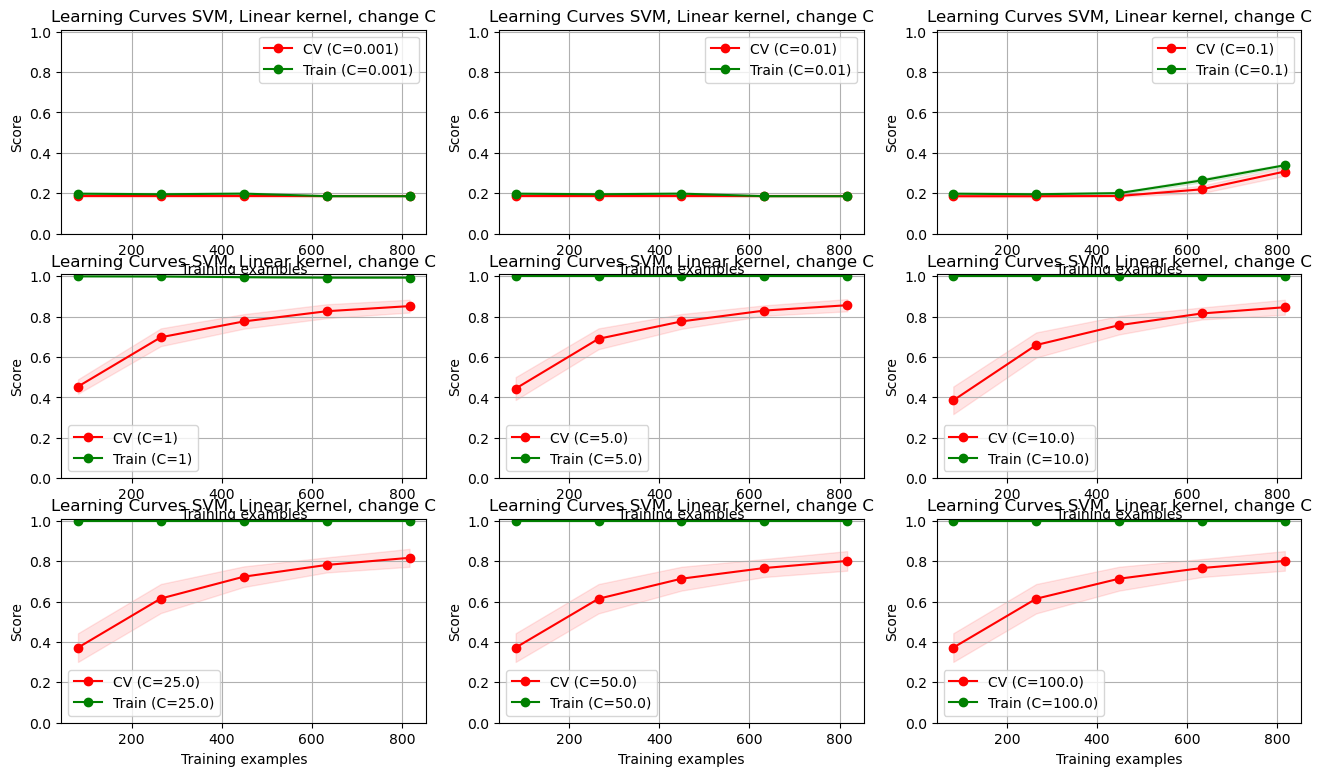

In [15]:
list_C = [0.001, 0.01, 0.1, 1, 5.0, 10.0, 25.0, 50.0, 100.0]

title = "Learning Curves SVM, Linear kernel, change C"
plt.figure(figsize = (16, 9))

for i, c in enumerate(list_C):
    plt.subplot(3, 3, i + 1)
    plot_learning_curve(SVC(kernel = 'linear', C = c), title, {'test': f'CV (C={c})', 'train': f'Train (C={c})'}, X_train, y_train, (0.0, 1.01), cv = 10, n_jobs = -1, idx_color = i, new_plot = True)

plt.show()

In [22]:
def grid_search(model, dict_param):
    classifier = GridSearchCV(estimator = model, param_grid = dict_param, cv = 5, n_jobs = -1, scoring = 'accuracy', verbose = 1)
    classifier.fit(X_train, y_train)

    print(classifier.best_params_)
    return classifier.best_estimator_

In [23]:
param_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'kernel' : ['linear','rbf', 'poly']
}

svm_best = grid_search(SVC(), param_svm)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [24]:
svm_best.fit(X_train, y_train)
y_pred = svm_best.predict(X_test)
print("Accuracy: ", accuracy_score(y_pred, y_test))

Accuracy:  0.8325991189427313


Dữ liệu training =  (1437, 64) (1437,)
Dữ liệu testing =  (360, 64) (360,)


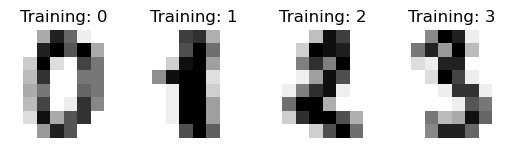

In [26]:
from sklearn import datasets, metrics

digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title('Training: %i' % label)

n_samples = len(digits.images)
data = digits.images.reshape((n_samples,-1))
target = digits.target
X_train_image, X_test_image, y_train_image, y_test_image = train_test_split(data, target, test_size = 0.2, random_state = 42)
print("Dữ liệu training = ", X_train_image.shape, y_train_image.shape)
print("Dữ liệu testing = ", X_test_image.shape, y_test_image.shape)

In [27]:
def grid_search(model, dict_param):
    classifier = GridSearchCV(estimator = model, param_grid = dict_param, cv = 4, n_jobs = -1, scoring = 'accuracy', verbose = 1)
    classifier.fit(X_train, y_train)

    return classifier

In [30]:
svm_best = grid_search(SVC(), param_svm)

svm_best.fit(X_train, y_train)
print(svm_best.best_params_)
print(svm_best.best_estimator_)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
Fitting 4 folds for each of 72 candidates, totalling 288 fits
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01)


In [31]:
y_pred = svm_best.predict(X_test)
print("Accuracy: ", accuracy_score(y_pred, y_test))

Accuracy:  0.8325991189427313
